## Initial view

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

In [60]:
from typing import List

def load_csv_data(filepath: str, columns: List[str], transpose: bool, sep: str = ',') -> pd.DataFrame:
    """
    Carrega o dataset EMG e organiza as colunas.

    Args:
        filepath (str): Caminho para o arquivo.
        columns (List[str]): Lista com os nomes das colunas.
        transpose (bool): Transpor o DataFrame.
        sep (str): Separador dos dados.

    Returns:
        pd.DataFrame: DataFrame com dados dos sensores e classes.
    """
    if transpose:
        df: pd.DataFrame = pd.read_csv(filepath, header=None, sep=sep).T
    else:
        df: pd.DataFrame = pd.read_csv(filepath, sep=sep)
    
    df.columns = columns
    
    return df

In [61]:
columns = ["x", "y", "spiral"]

df: pd.DataFrame = load_csv_data(filepath = "../resources/spiral.csv", columns = columns, transpose = False)

print(df.head())

          x         y  spiral
0  15.07298  -1.56346     1.0
1 -15.43986   0.16502    -1.0
2  -9.26071  12.24981    -1.0
3   7.59201   7.56913    -1.0
4  -2.37130 -10.69521     1.0


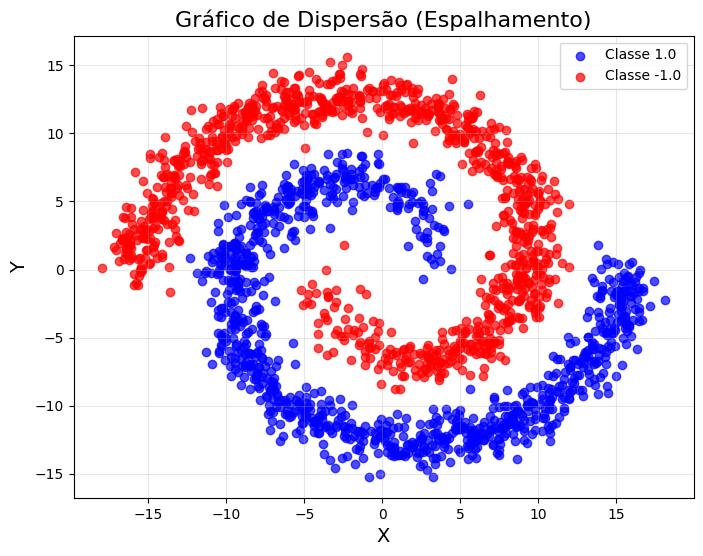

In [62]:
plt.figure(figsize=(8, 6))

plt.scatter(df[df['spiral'] == 1.0]['x'], 
            df[df['spiral'] == 1.0]['y'], 
            color='blue', label='Classe 1.0', alpha=0.7)

plt.scatter(df[df['spiral'] == -1.0]['x'], 
            df[df['spiral'] == -1.0]['y'], 
            color='red', label='Classe -1.0', alpha=0.7)

plt.title('Gráfico de Dispersão (Espalhamento)', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)

plt.legend()

plt.grid(alpha=0.3)
plt.show()

In [ ]:
def prepare_data(
    df: pd.DataFrame, 
    input_columns: List[str], 
    target_column: str,
    transpose: bool = False,
    test_size: float = 0.2, 
    random_state: int = 42
) -> dict:
    """
    Prepara o conjunto de dados para redes neurais, organizando entradas, saídas e divisões.

    Args:
        df (pd.DataFrame): DataFrame contendo o conjunto de dados.
        input_columns (list[str]): Lista com os nomes das colunas de entrada.
        target_column (str): Nome da coluna de saída (rótulos).
        transpose (bool): Transpor o DataFrame. Default é False.
        test_size (float): Proporção do conjunto de teste (0 a 1). Default é 0.2 (20%).
        random_state (int): Semente para reprodutibilidade da divisão. Default é 42.

    Returns:
        dict: Um dicionário contendo os conjuntos organizados:
            - 'X_train': Entradas para treinamento.
            - 'X_test': Entradas para teste.
            - 'Y_train': Rótulos para treinamento.
            - 'Y_test': Rótulos para teste.
    """
    X = df[input_columns].values
    Y = df[target_column].values
    
    if transpose:
        X = X.T
        Y = Y.reshape(1, -1)
        
        p, N = X.shape
        X = np.concatenate((
            -np.ones((1, N)),
            X
        ))
        
    else:
        N, p = X.shape
        X = np.concatenate((
            -np.ones((N, 1)),
            X
        ), axis = 1)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    return {
        'X_train': X_train,
        'X_test': X_test,
        'Y_train': Y_train,
        'Y_test': Y_test,
    }

In [72]:
data = prepare_data(
    df, 
    input_columns=["x", "y"], 
    target_column="spiral",
    transpose=False,
    test_size=0.2, 
    random_state=42
)

print(data['X_train'].shape)
print(data['X_test'].shape)
print(data['Y_train'].shape)
print(data['Y_test'].shape)

(1599, 3)
(400, 3)
(1599,)
(400,)


In [68]:
def sign(u: float) -> int:
    """
    Função de ativação degrau.

    Args:
        u (float): Soma ponderada.

    Returns:
        int: Saída da função de ativação.
    """
    return 1 if u >= 0 else -1

In [69]:
def simple_perceptron (
    X_train: np.ndarray, 
    Y_train: np.ndarray, 
    epochs: int = 1000, 
    learning_rate: float = 0.01,
    w_random: bool = True
) -> np.ndarray:
    """
    Implementa o Perceptron Simples.

    Args:
        X_train (np.ndarray): Entradas de treinamento, com dimensão (p+1, N), incluindo bias.
        Y_train (np.ndarray): Rótulos de treinamento, com dimensão (1, N).
        epochs (int): Número de épocas.
        learning_rate (float): Taxa de aprendizado.
        w_random (bool): Inicializar pesos aleatoriamente (True) ou como zeros (False).

    Returns:
        np.ndarray: Vetor de pesos aprendido, com dimensão (p+1, 1).
    """
    
    p, N = X_train.shape
    
    if w_random:
        W = np.random.random_sample((p, 1)) - 0.5
    else:
        W = np.zeros((p, 1))
    
    for epoch in range(epochs):
        for t in range(N):
            x_t = X_train[:, t].reshape(p, 1)
            d_t = Y_train[0, t]
            
            
            u_t = W.T @ x_t
            y_t = sign(u_t[0, 0])
            
            
            e_t = d_t - y_t
            W += (learning_rate * e_t * x_t) / 2
    
    return W

In [70]:
weights = simple_perceptron(
    X_train = data['X_train'], 
    Y_train = Y_train, 
    epochs = 100, 
    learning_rate = 0.01, 
    w_random = True
)

print("Pesos aprendidos:\n", weights)

Pesos aprendidos:
 [[-0.29038684]
 [ 0.20779615]
 [ 0.37017326]
 ...
 [ 0.1311835 ]
 [ 0.31240654]
 [ 0.50626675]]
